In [1]:
import numpy as np
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)
#includes all features from columns also floats and normalizes them
X = data.values[:,2:-1].astype('float64')
X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)
X = np.hstack([np.ones((X.shape[0], 1)),X]) #adds bias column and arrays data into vectors for quicker calculations
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

All feature weights:
[ 0.          0.76736753  0.88072182  1.08868283 -0.21171369  0.56271732
  1.65507951  2.3801738   0.05063709 -1.35163547  1.30820305 -0.37106399
  1.02123346  0.89909179 -0.68090788 -0.73428073 -0.49595529 -0.29101703
 -0.51694224 -0.69255944  1.66881075  1.27819432  1.57163635  1.48066087
  0.6106672   0.90128994  1.2486092   2.40210721  0.87914931]


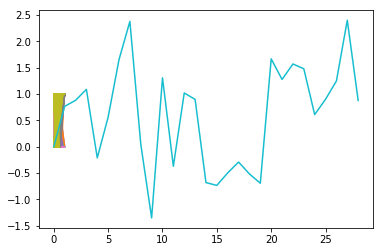

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
svm = SVC()
rfc =RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
ann = MLPClassifier()
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print('All feature weights:')
coef=logreg.coef_[0]
print(coef)
plt.plot(X, Y)
plt.plot(coef)
plt.show()

In [6]:
select = SelectFromModel(logreg, threshold=0.9)
select.fit(X_train, Y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
print('Scikit-learn Feature Selection:')
print('X_train shape is: {}'.format(X_train.shape))
print('X_train feature selected shape is: {}'.format(X_train_selected.shape))
print("\n", "These selected features are:")
mask = select.get_support()
print(mask)
idxs_selected = select.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
print(idxs_selected)

print("Scitkit-learn Features selected:")
print('texture_mean, smoothness_mean, compactness_mean, symmetry_mean, radius_se, symmetry_se')
print('fractal_dimension_se, radius_worst, texture_worst, area_worst, smoothness_worst, compactness_worst')
print("\n")

print('Accuracy with all features:')
svm.fit(X_train, Y_train)
print('The scikit-learn accuracy of SVM: {:.2f}'.format(svm.score(X_test, Y_test)*100),  '%')

rfc.fit(X_train, Y_train)
print('The scikit-learn accuracy of RFC: {:.2f}'.format(rfc.score(X_test, Y_test)*100),  '%')

nb.fit(X_train, Y_train)
print('The scikit-learn score of NB: {:.2f}'.format(nb.score(X_test, Y_test)*100),  '%')

knn.fit(X_train, Y_train)
print('The scikit-learn accuracy of KNN: {:.2f}'.format(knn.score(X_test, Y_test)*100),  '%')

ann.fit(X_train, Y_train)
print('The scikit-learn accuracy of MLP: {:.2f}'.format(ann.score(X_test, Y_test)*100),  '%')

logreg.fit(X_train, Y_train)
print('The scikit-learn accuracy of LR: {:.2f}'.format(logreg.score(X_test, Y_test)*100),  '%')

print('\n')
print('Accuracy with feature selection:')

select2 =SelectFromModel(svm, threshold=0.5)
select2.fit(X_train, Y_train)
X_train_selected2 = select.transform(X_train)
X_test_selected2 = select.transform(X_test)
svm.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of SVM: {:.2f}'.format(svm.score(X_test_selected2, Y_test)*100),  '%')

select3 =SelectFromModel(rfc, threshold=0.9)
select3.fit(X_train, Y_train)
X_train_selected3 = select.transform(X_train)
X_test_selected3 = select.transform(X_test)
rfc.fit(X_train_selected3, Y_train)
print('The scikit-learn accuracy of RFC: {:.2f}'.format(rfc.score(X_test_selected3, Y_test)*100),  '%')

select4 =SelectFromModel(nb, threshold=0.9)
select4.fit(X_train, Y_train)
X_train_selected4 = select.transform(X_train)
X_test_selected4 = select.transform(X_test)
nb.fit(X_train_selected4, Y_train)
print('The scikit-learn accuracy of NB: {:.2f}'.format(nb.score(X_test_selected4, Y_test)*100),  '%')

select5 =SelectFromModel(knn, threshold=0.9)
select5.fit(X_train, Y_train)
X_train_selected5 = select.transform(X_train)
X_test_selected5 = select.transform(X_test)
knn.fit(X_train_selected5, Y_train)
print('The scikit-learn accuracy of KNN: {:.2f}'.format(knn.score(X_test_selected5, Y_test)*100),  '%')

select6 =SelectFromModel(ann, threshold=0.9)
select6.fit(X_train, Y_train)
X_train_selected6 = select.transform(X_train)
X_test_selected6 = select.transform(X_test)
ann.fit(X_train_selected6, Y_train)
print('The scikit-learn accuracy of MLP: {:.2f}'.format(ann.score(X_test_selected6, Y_test)*100),  '%')

select = SelectFromModel(logreg, threshold=0.9)
select.fit(X_train, Y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
logreg.fit(X_train_selected, Y_train)
print('The scikit-learn accuracy of LR: {:.2f}'.format(logreg.score(X_test_selected, Y_test)*100),  '%')


Scikit-learn Feature Selection:
X_train shape is: (426, 29)
X_train feature selected shape is: (426, 13)

 These selected features are:
[False False False  True False False  True  True False  True  True False
  True False False False False False False False  True  True  True  True
 False  True  True  True False]
[ 3  6  7  9 10 12 20 21 22 23 25 26 27]
Scitkit-learn Features selected:
texture_mean, smoothness_mean, compactness_mean, symmetry_mean, radius_se, symmetry_se
fractal_dimension_se, radius_worst, texture_worst, area_worst, smoothness_worst, compactness_worst


Accuracy with all features:
The scikit-learn accuracy of SVM: 95.10 %
The scikit-learn accuracy of RFC: 95.10 %
The scikit-learn score of NB: 91.61 %
The scikit-learn accuracy of KNN: 96.50 %
The scikit-learn accuracy of MLP: 97.20 %
The scikit-learn accuracy of LR: 95.10 %


Accuracy with feature selection:
The scikit-learn accuracy of SVM: 95.80 %
The scikit-learn accuracy of RFC: 94.41 %
The scikit-learn accuracy of N

In [14]:
print("Scitkit-learn Features selected:")
print('texture_mean, smoothness_mean, compactness_mean, symmetry_mean, radius_se, symmetry_se')
print('fractal_dimension_se, radius_worst, texture_worst, area_worst, smoothness_worst, compactness_worst')
print("(13 features selected)", "\n")
print('Feature Selection by Coefficient Ranking:')
coefs=logreg.coef_[0]
top_thirteen = np.argpartition(coefs, -13)[-13:]
print('Top thirteen weighted:',coefs[top_thirteen])
print('Top thirteen named:', data.columns[top_thirteen])

Scitkit-learn Features selected:
texture_mean, smoothness_mean, compactness_mean, symmetry_mean, radius_se, symmetry_se
fractal_dimension_se, radius_worst, texture_worst, area_worst, smoothness_worst, compactness_worst
(13 features selected) 

Feature Selection by Coefficient Ranking:
Top thirteen weighted: [-1.61643195  1.32270534  2.45939045  1.2749157   1.16879421  0.89211581
  2.02866296  1.64053068  1.89740965  1.70519773  1.13746169  1.20669614
  2.75497896]
Top thirteen named: Index(['perimeter_mean', 'radius_mean', 'texture_mean', 'diagnosis',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se'],
      dtype='object')
